In [21]:
import pandas as pd
from sklearn.pipeline import Pipeline
train=pd.read_csv("data/customer_churn_dataset-training.csv")
test=pd.read_csv("data/customer_churn_dataset-testing.csv")
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [22]:
test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [23]:
train.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [24]:
test.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000,64374.000000
mean,32187.500000,41.970982,31.994827,15.080234,5.400690,17.133952,541.023379,15.498850,0.473685
std,18583.317451,13.924911,17.098234,8.816470,3.114005,8.852211,260.874809,8.638436,0.499311
min,1.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,16094.250000,30.000000,18.000000,7.000000,3.000000,10.000000,313.000000,8.000000,0.000000
50%,32187.500000,42.000000,33.000000,15.000000,6.000000,19.000000,534.000000,15.000000,0.000000
75%,48280.750000,54.000000,47.000000,23.000000,8.000000,25.000000,768.000000,23.000000,1.000000
max,64374.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [25]:
test.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [26]:
train.isnull().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [27]:
train.dropna(inplace=True)

In [28]:
test=test.drop('CustomerID',axis=1)
test.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [29]:
train=train.drop('CustomerID',axis=1)
train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [30]:
df=pd.concat([train,test],axis=0)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [34]:
df[df.duplicated()]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [35]:
df.shape

(505206, 11)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
def categorical_data(col):
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df)
    plt.subplot(1,2,2)
    df[col].value_counts().plot(kind='pie',autopct='%0.2f%%')
    plt.tight_layout()
    plt.show()

def numerical_data(col):
    plt.subplot(1,2,1)
    sns.kdeplot(x=col,data=df)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.tight_layout()
    plt.show()

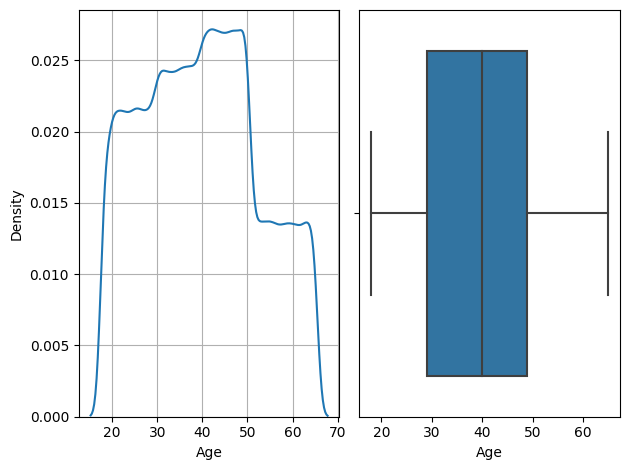

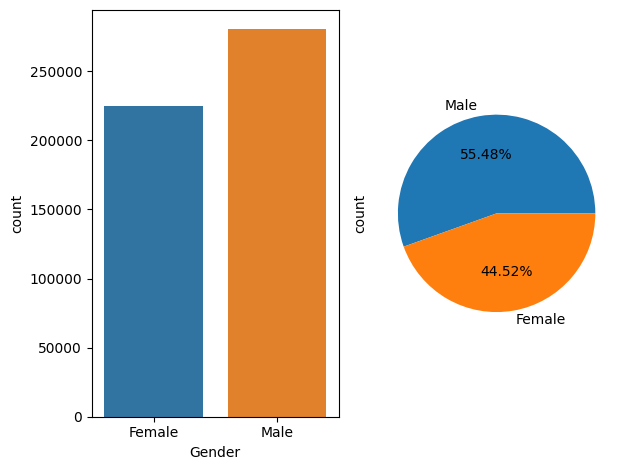

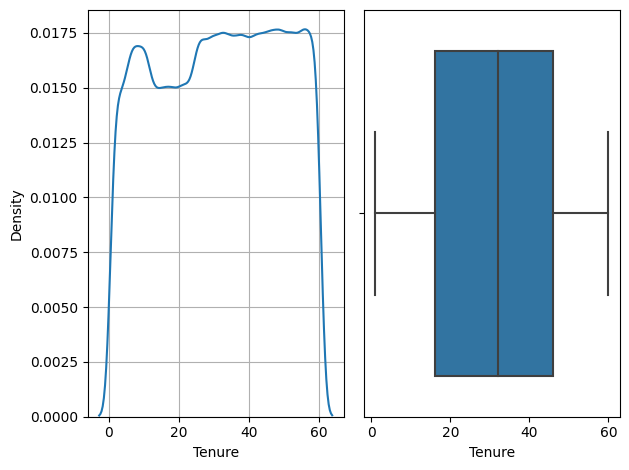

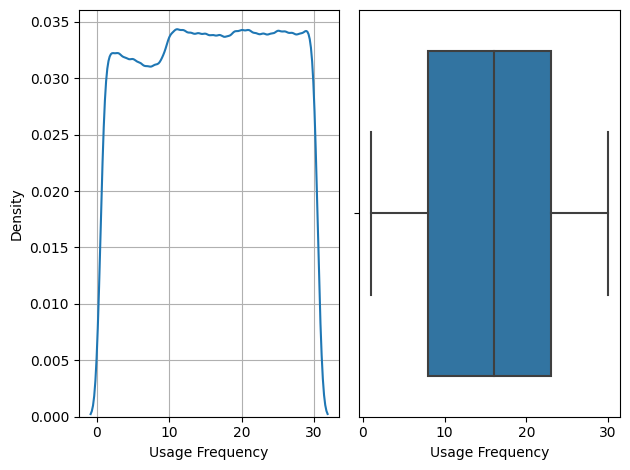

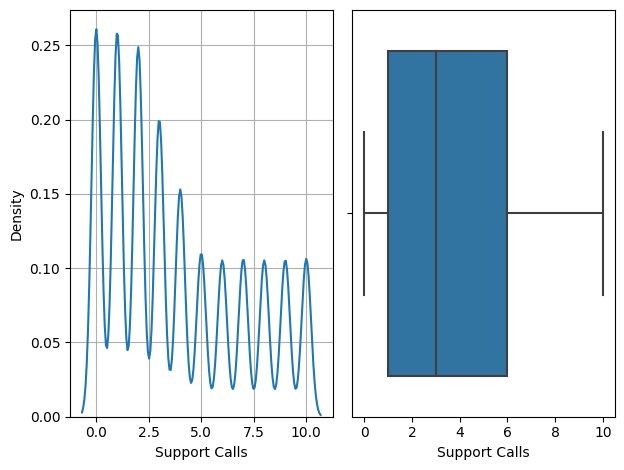

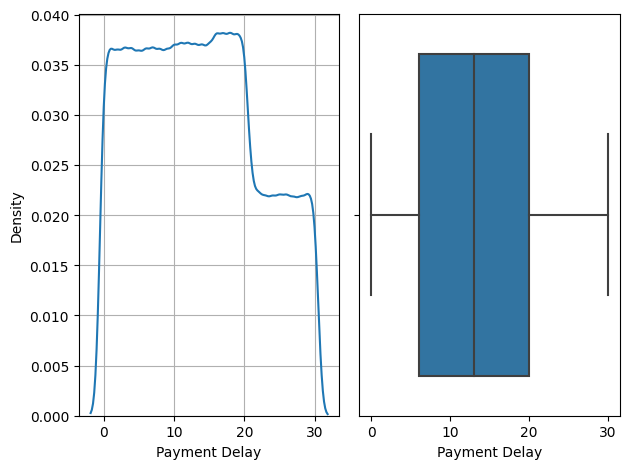

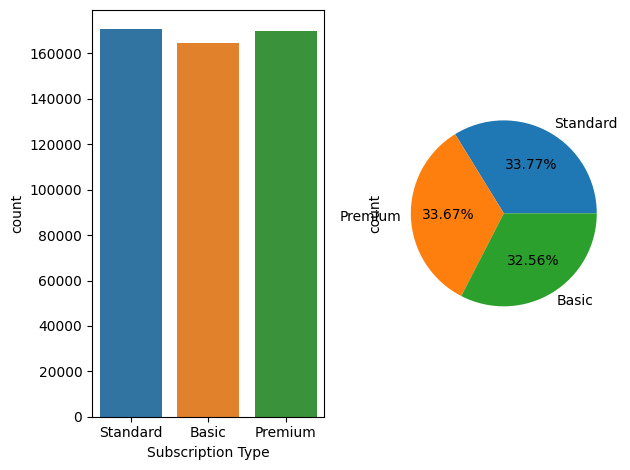

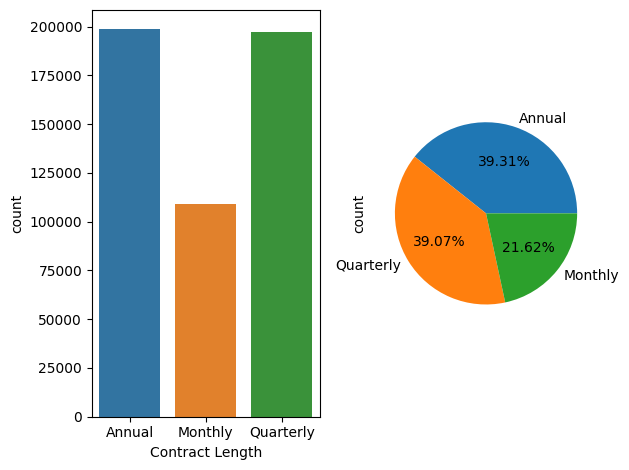

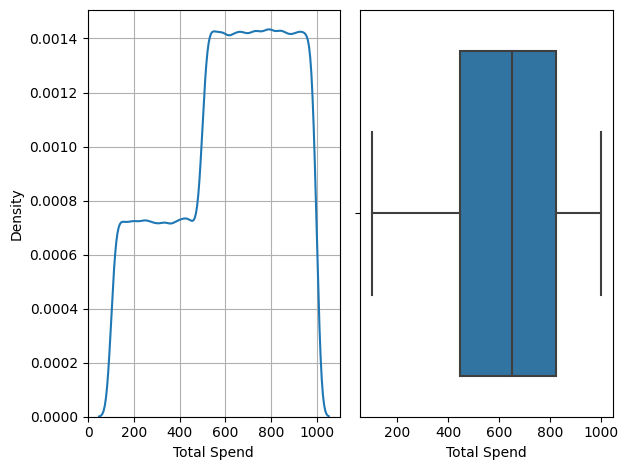

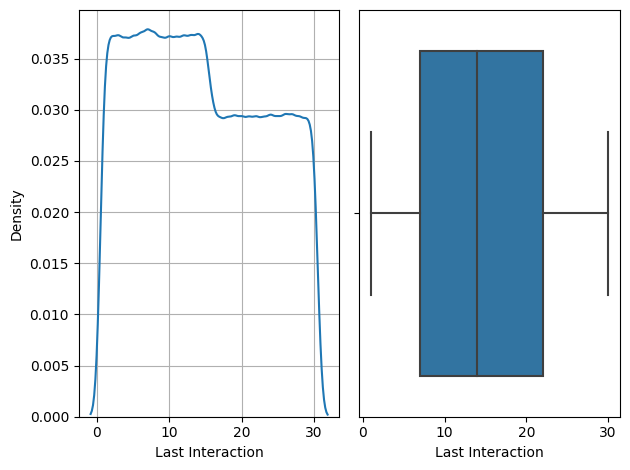

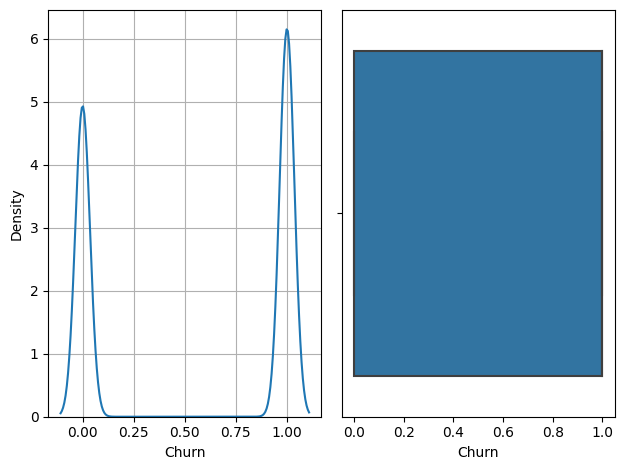

In [38]:
for i in df.columns:
    if df[i].dtype== "object":
        categorical_data(i)
    else:
        numerical_data(i)

In [39]:
y=df['Churn']
x=df.drop('Churn',axis=1)

<Axes: >

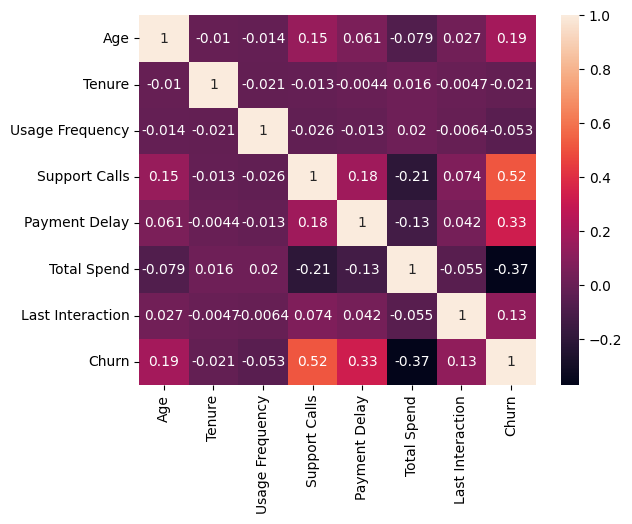

In [40]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)

In [48]:
for i in x.select_dtypes(include='object').columns:
    print(x[i].value_counts())
    print("\n")

Gender
Male      280273
Female    224933
Name: count, dtype: int64


Subscription Type
Standard    170630
Premium     170099
Basic       164477
Name: count, dtype: int64


Contract Length
Annual       198608
Quarterly    197364
Monthly      109234
Name: count, dtype: int64




In [49]:
for i in x.select_dtypes(include='object').columns:
    x[i]=x[i].map(x[i].value_counts(normalize=True))

<Axes: >

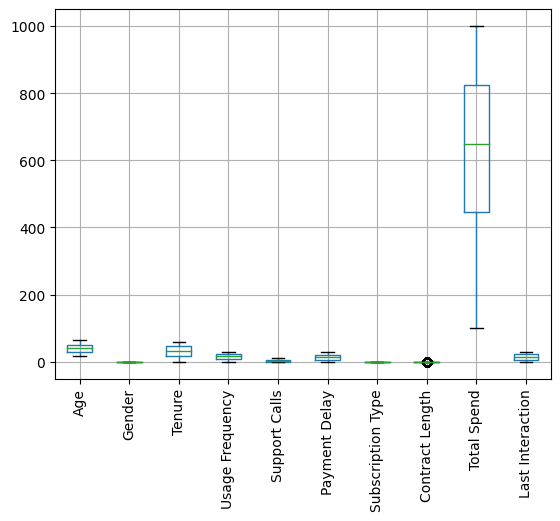

In [50]:
x.boxplot(rot=90)

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
mmax=MinMaxScaler()
x[['Age','Tenure', 'Usage Frequency', 'Support Calls','Payment Delay','Total Spend','Last Interaction']]=mmax.fit_transform(x[['Age','Tenure', 'Usage Frequency', 'Support Calls','Payment Delay','Total Spend','Last Interaction']])
x.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,0.255319,0.44523,0.644068,0.448276,0.5,0.600000,0.337743,0.393123,0.924444,0.551724
1,1.000000,0.44523,0.813559,0.000000,1.0,0.266667,0.325564,0.216217,0.507778,0.172414
2,0.787234,0.44523,0.220339,0.103448,0.6,0.600000,0.325564,0.390660,0.094444,0.068966
3,0.851064,0.55477,0.627119,0.689655,0.7,0.233333,0.337743,0.216217,0.328889,0.965517
4,0.106383,0.55477,0.525424,0.655172,0.5,0.266667,0.325564,0.216217,0.574444,0.655172


<Axes: >

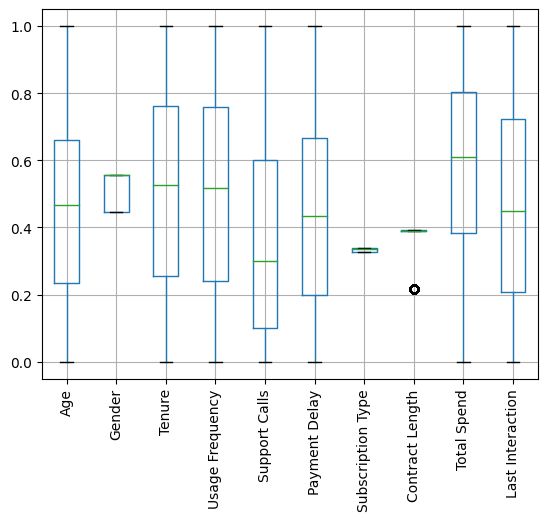

In [53]:
x.boxplot(rot=90)

In [54]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [69]:
from sklearn.metrics import accuracy_score,f1_score

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [72]:
def predictor(model_name):    
    print("For the {}".format(model_name))    
    model_name.fit(xtrain,ytrain)    
    y_pred_test = model_name.predict(xtest)    
    print("The accuracy is",accuracy_score(ytest,y_pred_test))    
    print("The R2_score is",f1_score(ytest,y_pred_test))    

In [74]:
models=[lr,dt,rf,knn,gnb]
for i in models:
    print(predictor(i))

For the LogisticRegression()
The accuracy is 0.8469141341497209
The R2_score is 0.8604374187960155
None
For the DecisionTreeClassifier()
The accuracy is 0.8823055911112284
The R2_score is 0.8932239913803425
None
For the RandomForestClassifier()
The accuracy is 0.935188239796255
The R2_score is 0.9449281537504134
None
For the KNeighborsClassifier()
The accuracy is 0.8953497578548713
The R2_score is 0.9067257875763759
None
For the GaussianNB()
The accuracy is 0.8577479843232473
The R2_score is 0.8670825986708259
None
